The purpose of this notebook is to build up step by step the figures in Russel's paper published in 1998 in The Leading Edge 17, p 885: "A simple seismic imaging exercice".

First, let's define a couple of useful variables and functions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import math

# Parameters you can tweak
distance_from_origin = 10.0
distance_from_source = 20.0
refector_slope = -0.5

# Basic points, defined as tuples (x, y, label)
origin_p = (0.0, 0.0, 'O=0')
Sx = distance_from_origin
Sy = 0.0
source_p = (Sx, Sy, 'S=Shot')
Rx = source_p[0]+distance_from_source
Ry = 0.0
receiver_p = (Rx, Ry, 'R=Receiver')
Mx = source_p[0]+(distance_from_source/2.0)
My = 0.0
mid_p = (Mx, My, 'M=Midpoint')

# Plot and annotate the given list of points
def plot_points(points_to_draw):
    for p in points_to_draw:
        plt.plot(p[0], p[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="white")
        if len(p)>2:
            plt.annotate(p[2],
                 (p[0], p[1]),
                 textcoords="offset points",
                 xytext=(1,5),
                 ha='left')

# Build template plot
def make_plot():
    # Surface
    plt.axhline(y=0.0, color='b', linestyle='-')
    
    # Dipping Reflector
    plt.axline((0.0, 0.0), slope=refector_slope, color='r', linestyle='-')
    
    # Base points
    plot_points([origin_p, source_p, receiver_p, mid_p])

    ax = plt.gca()

    # Force display limits
    ax.set_xlim(-1.0, Rx+5.0)
    ax.set_ylim(-Rx, 2.0)
    
    # Change major ticks to show every 10
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    
    # Change minor ticks to show every 1 (10/10)
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(10))
    
    # Turn grid on for both major and minor ticks
    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

    ax.set_aspect('equal')

Now we can plot the first figure easily and use it as a template to build more advanced figures. We just have to call make_plot().

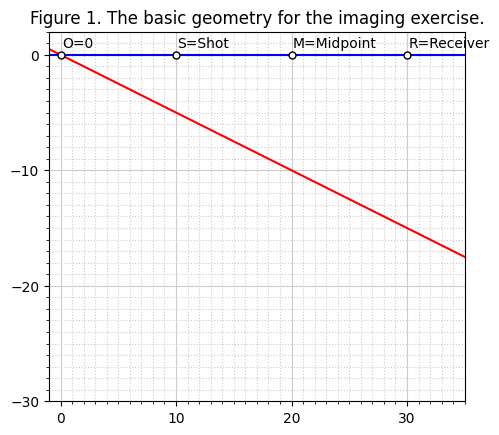

In [2]:
make_plot()

plt.title('Figure 1. The basic geometry for the imaging exercise.')
plt.show()

Note that the dipping reflector is represented by a line following the equation:
$$
y = a_0.x+b_0
$$
with $a_0=-\frac{1}{2}$ and $b_0=0$

Now, the line that passes through S and intersects the reflector at right angles has the following equation:
$$
y = a_1.x+b_1
$$
with $a_1=-\frac{1}{a_0}$ and $b_1=-a_1.S_x$

Let's use Python to calculate these values.

In [3]:
# Do the maths!
a0 = refector_slope
b0 = 0.0
a1 = -1/a0
b1 = -a1*source_p[0]

print(f'a1={a1} b1={b1}')

a1=2.0 b1=-20.0


Now let's plot this line.

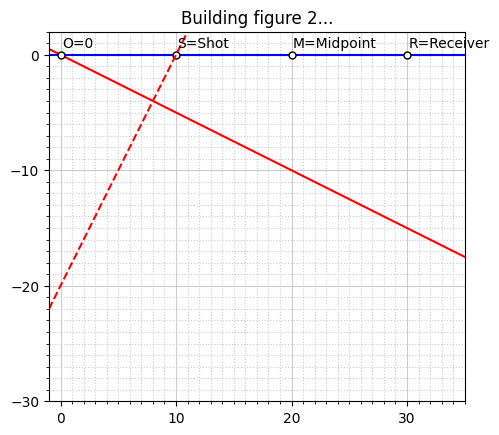

In [4]:
make_plot()

# Line passing through S
plt.axline((source_p[0], source_p[1]), slope=a1, color='r', linestyle='--')

plt.title('Building figure 2...')
plt.show()

We can easily calculate the point $I$ where this new line intersects the reflector:
$$
a_1.I_x-b_1 = a_0.I_x + b_0
$$
$$
I_x = \frac{b_1-b_0}{a_0-a1}
$$

And using equation of the reflector:
$$
I_y = a_0.I_x + b_0
$$

Let's use Python to get I's coordiates.

In [5]:
Ix = (b1-b0)/(a0-a1)
Iy = a0*Ix + b0
I_p = (Ix, Iy, 'I')

print(f'I({Ix};{Iy})')

I(8.0;-4.0)


We add point $I$ to the plot.

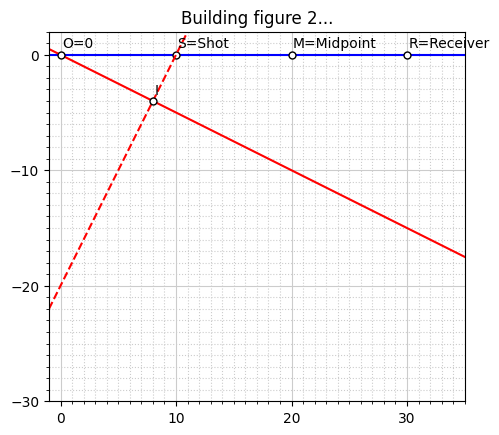

In [6]:
make_plot()

# Line passing through S
plt.axline((source_p[0], source_p[1]), slope=a1, color='r', linestyle='--')

# Intersection
plot_points([I_p])

plt.title('Building figure 2...')
plt.show()

Coordinates of point $S'$ can be calculated easily according to $S$ and $I$:
$$
S'_x = 2I_x - S_x
$$
$$
S'_y = a_1.S'_x + b_1
$$

In [7]:
Spx = 2*Ix - source_p[0]
Spy = a1*Spx + b1
Sp_p = (Spx, Spy, "S'")

print(f'S\'({Spx};{Spy})')

S'(6.0;-8.0)


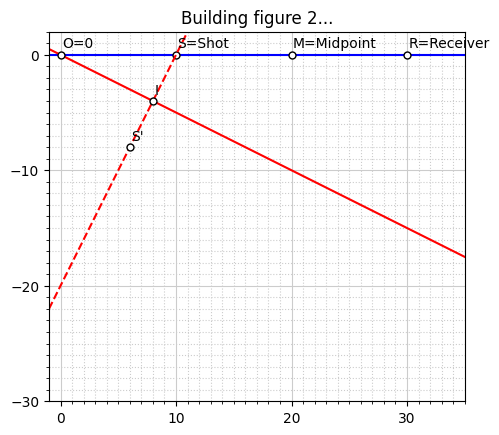

In [8]:
make_plot()

# Line passing through S
plt.axline((source_p[0], source_p[1]), slope=a1, color='r', linestyle='--')

# Intersection and S'
plot_points([I_p, Sp_p])

plt.title('Building figure 2...')
plt.show()

The line passing through $S'$ and $R$ can be defined by the following equation:
$$
y = a_2x+b_2
$$
with $a_2=\frac{-S'_y}{R_x-S'_x}$ and $b_2=-a_2 . R_x$.

In [9]:
a2 = -Spy/(receiver_p[0]-Spx)
b2 = -a2*receiver_p[0]

print(f'a2={a2} b2={b2}')

a2=0.3333333333333333 b2=-10.0


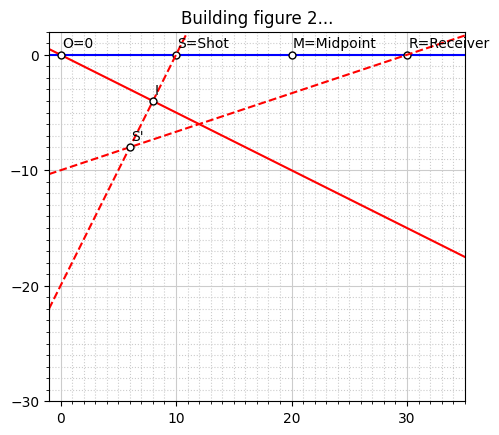

In [10]:
make_plot()

# Line passing through S
plt.axline((source_p[0], source_p[1]), slope=a1, color='r', linestyle='--')

# Line passing through S' and R
plt.axline((receiver_p[0], receiver_p[1]), slope=a2, color='r', linestyle='--')

# Intersection and S'
plot_points([I_p, Sp_p])

plt.title('Building figure 2...')
plt.show()

Just like for $I$, we can easily calculate the point $P$ where this new line intersects the reflector:
$$
a_2P_x-b_2 = a_0x + b_0
$$
$$
P_x = \frac{b_2-b_0}{a_0-a2}
$$

And using equation of the reflector:
$$
P_y = a_0P_x + b_0
$$

In [11]:
Px = (b2-b0)/(a0-a2)
Py = a0*Px + b0
P_p = (Px, Py, 'P')

print(f'P({Px};{Py})')

P(12.000000000000002;-6.000000000000001)


We need a last point to plot the full figure 2: $N$. Following the same logic as we did, we can define coordinates of $N$ with regards of known variables. As a matter of fact, $N$ is on a line parallel to $y=a_1x+b_1$ that passes though $P$.

$$
N_x = a_0.P_y + P_x
$$
$$
N_y = 0
$$

Now we have everything to plot Figure 2.

In [12]:
Nx = (a0*Py) + Px
Ny = 0.0
N_p = (Nx, Ny, 'N')

print(f'N({Nx};{Ny})')

N(15.000000000000002;0.0)


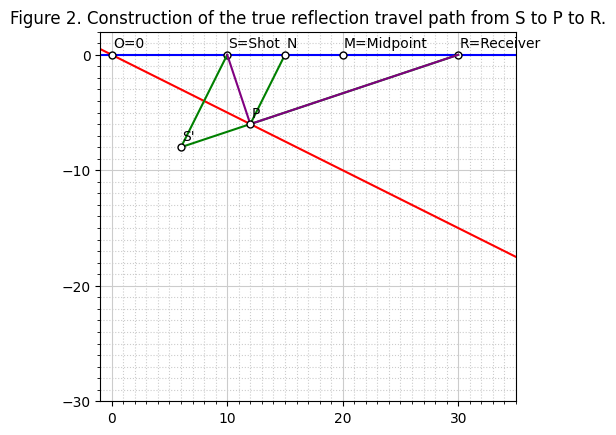

In [13]:
# Plot template (Figure 1)
make_plot()

# S to S'
plt.plot([source_p[0], Spx], [source_p[1], Spy], color='g', linestyle='-')
# S' to R
plt.plot([receiver_p[0], Spx], [receiver_p[1], Spy], color='g', linestyle='-')
# N to P
plt.plot([Nx, Px], [Ny, Py], color='g', linestyle='-')

# true reflection travel path: S to P to R
plt.plot([source_p[0], Px], [source_p[1], Py], color='purple', linestyle='-')
plt.plot([receiver_p[0], Px], [receiver_p[1], Py], color='purple', linestyle='-')

# N, P and S'
plot_points([N_p, P_p, Sp_p])

plt.title('Figure 2. Construction of the true reflection travel path from S to P to R.')
plt.show()

The next figure introduces a new point $P'$ to illustrate the the zero dip NMO assumption. $P'$ is right under $M$ at a depth $d$. Equation (3) in the paper gives us $L^2 = d^2 + h^2$ whith $L$ being the length of each raypath and $h$ the distance between $S$ and $M$.

It is trivial to express $d$ as a function of $L$ and $h$: $d = \sqrt{L^2 - h^2}$

Now what's the value of $L$ and $h$?

As for $h$ it is quite easy as we already know points $S$ and $M$: $h = M_x-S_x$

Finally, $L$ being the length of each raypath, it is equal to half the true travel path length and we know it: $L = \frac{SP + PR}{2}$

Let's use Python to plot Figure 3.

In [14]:
L = (math.dist((Sx, Sy), (Px, Py)) + math.dist((Rx, Ry), (Px, Py))) / 2
h = Mx-Sx
d = math.sqrt(L*L - h*h)

Ppx = Mx
Ppy = -d
Pp_p = (Ppx, Ppy, "P'")

print(f'L = {L}')
print(f'h = {h}')
print(f'd = {d}')
print(f"P'({Ppx};{Ppy})")

L = 12.649110640673518
h = 10.0
d = 7.745966692414836
P'(20.0;-7.745966692414836)


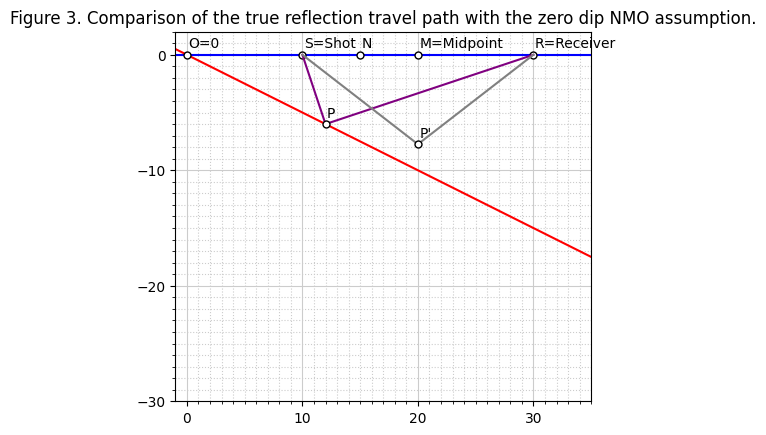

In [15]:
# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([source_p[0], Px], [source_p[1], Py], color='purple', linestyle='-')
plt.plot([receiver_p[0], Px], [receiver_p[1], Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P and P'
plot_points([N_p, P_p, Pp_p])

plt.title('Figure 3. Comparison of the true reflection travel path with the zero dip NMO assumption.')
plt.show()

We are ready to plot the full prestack time migration ellipse. This is straight forward using matplotlib Ellipse feature.

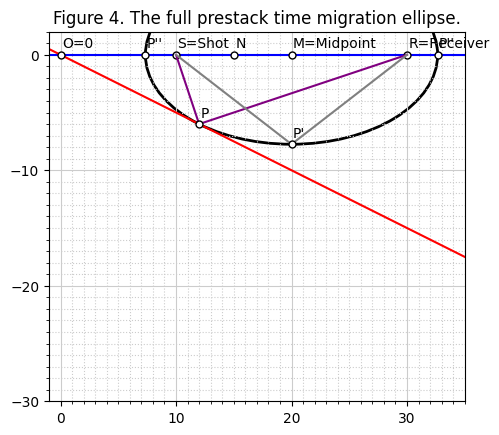

In [17]:
from matplotlib.patches import Ellipse

# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([source_p[0], Px], [source_p[1], Py], color='purple', linestyle='-')
plt.plot([receiver_p[0], Px], [receiver_p[1], Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P, P', P''
Ppp1_p = (Mx-L, My, "P''")
Ppp2_p = (Mx+L, My, "P''")
plot_points([N_p, P_p, Pp_p, Ppp1_p, Ppp2_p])

# full prestack Ellispe
prestack_ellipse = Ellipse([Mx, My], L*2, d*2, linewidth=2, fill=False)
plt.gca().add_artist(prestack_ellipse)

plt.title('Figure 4. The full prestack time migration ellipse.')
plt.show()